# Lab 3 : MK Titanic Data Analysis
**Author:** Mahitha 

**Date:** April 03, 2025 

**Objective:** This project analyzes the Titanic dataset to explore passenger characteristics and survival patterns. It includes data inspection, exploration, cleaning, feature engineering, and splitting for machine learning, using Python with pandas, seaborn, matplotlib, and scikit-learn.


## Introduction

Using the Titanic dataset from Seabor, we will train multiple classification models: Decision Tree Classifier, Support Vector Machine(SVM), and Neural Network (NN), evaluate their performance, and intepret the reuslts. We will focus on various input features to predict the target variable "survived".

The steps involve data cleaning, feature engineering, model training, performance evaluation and comparisons. We will explore different feature combinations to observe how they affect the accuracy of the models.

## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook to perform data manipulation, modle training and evaluation. These libraries will help to load the dataset, handle missing values, perform machine learning tasks and visualize the results. 

In [1]:
''' Imports for the Titanic dataset '''

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()

# Check the type of the dataset
print(type(titanic))
# Check the data types of each column
print(titanic.dtypes)



<class 'pandas.core.frame.DataFrame'>
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [4]:

# Get column headers
column_headers = titanic.columns.tolist()
print(column_headers)



['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


## Section 2: Data Exploration and Preparation
2.1 Handle Missing Values
In this step, we will handle any missing values in the dataset. Specifically, we'll impute missing values for the age column using the median value of the column, and for the embark_town column using the mode (most frequent value).

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Age was missing values. 
# We can impute missing values for age using the median:
# Fill missing 'age' values with the median (since it's a numerical column)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing 'embark_town' values with the mode (most frequent value)
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Handle 'deck' by filling with 'Unknown'
# First, check if 'deck' is a categorical column and set the categories before filling
if titanic['deck'].dtype.name == 'category':
    # Add 'Unknown' as a valid category
    titanic['deck'] = titanic['deck'].cat.add_categories(['Unknown'])

# Fill missing 'deck' values with 'Unknown'
titanic['deck'] = titanic['deck'].fillna('Unknown')

## 2.2 Feature Engineering
Creating New Features:
Family Size:


In [7]:
# Create the 'family_size' feature by combining 'sibsp' (siblings/spouses) and 'parch' (parents/children)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Display the first few rows of the updated dataset to verify the new feature
print(titanic[['sibsp', 'parch', 'family_size']].head())

   sibsp  parch  family_size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


In [8]:
# Convert 'sex' column to numeric: male = 0, female = 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Display the first few rows to check the transformation
print(titanic[['sex', 'survived']].head())

   sex  survived
0    0         0
1    1         1
2    1         1
3    1         1
4    0         0


### Convert categorical "embarked" to numeric:
Mapped the "embarked" column, which contains the ports where passengers boarded (C = Cherbourg, Q = Queenstown, S = Southampton), to numeric values 0, 1, and 2

In [9]:
# Fill missing 'embarked' values with a default value (for example, 'S' for Southampton)
titanic['embarked'] = titanic['embarked'].fillna('S')

# Map the 'embarked' column to numeric values
# 'C' (Cherbourg) -> 0, 'Q' (Queenstown) -> 1, 'S' (Southampton) -> 2
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the result
print(titanic[['embarked']].head(20))



    embarked
0          2
1          0
2          2
3          2
4          2
5          1
6          2
7          2
8          2
9          0
10         2
11         2
12         2
13         2
14         2
15         2
16         1
17         2
18         2
19         0


In [11]:
# Check for unique values in the 'Embarked' column
unique_embarked_values = titanic['embarked'].dropna().unique()

# Display the unique values
print(unique_embarked_values)

[2 0 1]


### Explanation: Convert categorical "embarked" to numeric:
In this step, the embarked column, which contains categorical values representing the ports where passengers boarded, is mapped to numeric values. The ports are encoded as:

C (Cherbourg) is mapped to 0,
Q (Queenstown) is mapped to 1,
S (Southampton) is mapped to 2.
Additionally, missing values in the embarked column are filled with a default value of 'S' (Southampton) before applying the mapping. This ensures there are no missing values when mapping the column to numeric values.

For example, in the first few rows of the dataset:

Row 1: embarked = 2 (Southampton),
Row 2: embarked = 0 (Cherbourg),
Row 3: embarked = 2 (Southampton),
And so on.
This transformation allows us to work with a numerical representation of the embarked feature, which is essential for machine learning algorithms

## Binary feature - convert "alone" to numeric:
Converted the "alone" feature to a binary numeric format, where the value 1 represents passengers who were alone, and 0 represents those who had family members on board.

In [12]:
# Check for unique values in the 'Embarked' column
unique_embarked_values = titanic['alone'].dropna().unique()

# Display the unique values
print(unique_embarked_values)

# Ensure the 'alone' column is boolean type (if it's not already)
titanic['alone'] = titanic['alone'].astype('bool')

# Fill missing values in 'alone' column with False (if any)
titanic['alone'] = titanic['alone'].fillna(False)

titanic['alone'] = titanic['alone'].map({True: 1, False: 0})

# Check the result
print(titanic[['alone']].head())

[False  True]
   alone
0      0
1      0
2      1
3      0
4      1


### Section 3. Feature Selection and Justification
3.1 Choose Features and Target
In this section, we are selecting the input features (X) and the target variable (y) for each of the three cases. The target variable will always be survived, and the input features will vary depending on the case.

We will handle three input feature cases:

Case 1: Use alone as the input feature (binary indicator of whether the passenger was alone or not).
Case 2: Use age as the input feature (numerical feature representing the age of the passenger).
Case 3: Use both age and family_size as input features (numerical features representing the age of the passenger and the size of their family).
The target for all three cases will be survived, which is the binary outcome (0 for no, 1 for yes) of whether the passenger survived the Titanic disaster.

3.2 Define X (features) and y (target)
In this section, we will define the input features (X) and the target variable (y) for each of the three cases. The X will be a DataFrame containing the input features, while y will be a Series containing the target variable.

We will handle the three cases as described in 3.1, using comments to run one case at a time:

Case 1: alone only
X will contain only the alone column.
y will be the survived column.

In [13]:
# Case #1: alone only
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only (or your choice)
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size (or your choice)
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

#### Case 2: age only
X will contain only the age column.
y will be the survived column.

In [14]:
# Case 2: age only
X_case_2 = titanic[['age']]  # Input feature: 'age'
y_case_2 = titanic['survived']  # Target: 'survived'

# Check the first few rows to confirm the data
print("Case 2 - Features (X):")
print(X_case_2.head())  # Print the input features
print("\nCase 2 - Target (y):")
print(y_case_2.head())  # Print the target variable

Case 2 - Features (X):
    age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0

Case 2 - Target (y):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### Case 3: age + family_size (or your choice)
X will contain both age and family_size as input features.
y will be the survived column.

In [15]:
# Step 1: Create the 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Step 2: Verify the 'family_size' column exists and inspect the data
print(titanic[['age', 'family_size']].head())  # Print the first few rows to confirm

# Step 3: Case 3 - age + family_size
X_case_3 = titanic[['age', 'family_size']]  # Input features: 'age' and 'family_size'
y_case_3 = titanic['survived']  # Target: 'survived'

# Check the first few rows of X_case_3 and y_case_3 to confirm the data
print("\nCase 3 - Features (X):")
print(X_case_3.head())  # Print the input features
print("\nCase 3 - Target (y):")
print(y_case_3.head())  # Print the target variable

    age  family_size
0  22.0            2
1  38.0            2
2  26.0            1
3  35.0            2
4  35.0            1

Case 3 - Features (X):
    age  family_size
0  22.0            2
1  38.0            2
2  26.0            1
3  35.0            2
4  35.0            1

Case 3 - Target (y):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


#### 1. Why are these features selected?
The features are selected based on their relevance to survival:

Case 1 (alone): Indicates if the passenger was traveling alone, which may impact survival.
Case 2 (age): Age affects survival chances, with children likely having higher survival rates.
Case 3 (age + family_size): Combines age and family size, both of which could influence survival, with family size potentially making a difference.
2. Are there features that are likely to be highly predictive of survival?
Yes:

"sex" (gender): Women had higher survival rates.
"age": Younger passengers had a higher chance of survival.
"pclass": Higher-class passengers were more likely to survive.
"family_size" and "alone": Family dynamics may impact survival chances.

#### Section 4. Train a Classification Model (Decision Tree)
4.1 Split the Data
In this step, we will split the dataset into training and test sets. We will use StratifiedShuffleSplit to ensure that the distribution of the target variable (survived) is evenly represented in both the training and test sets.

In [48]:
# Step 1: Create the 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Step 2: Verify the 'family_size' column exists and inspect the data
print(titanic[['age', 'family_size']].head())  # Print the first few rows to confirm

# Case #1: alone only
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only (or your choice)
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size (or your choice)
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

    age  family_size
0  22.0            2
1  38.0            2
2  26.0            1
3  35.0            2
4  35.0            1


#### Section 4. Train a Classification Model (Decision Tree) - Case #1
**4.1 Split the Data**
- Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [40]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X1, y1):
    X_train = X1.iloc[train_indices]
    X_test = X1.iloc[test_indices]
    y_train = y1.iloc[train_indices]
    y_test = y1.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


#### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [41]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 4.3 Predict and Evaluate Model Performance
- Evaluate model performance on training data

In [42]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [43]:
### Evaluate model performace on test data

y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[72 38]
 [29 40]]


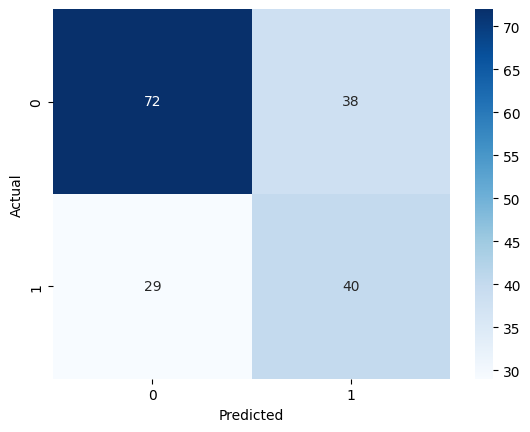

In [45]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Section 4. Train a Classification Model (Decision Tree) - Case #2
4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [55]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))
###4.2 Create and Train Model (Decision Tree)
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)


Train size:  712 Test size:  179


DecisionTreeClassifier()

In [ ]:

# Predict and evaluate training data (X train)
y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [56]:
# Predict and evaluate test data
y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



4.4 Report Confusion Matrix (as a heatmap)
- Plot a confusion matrix:

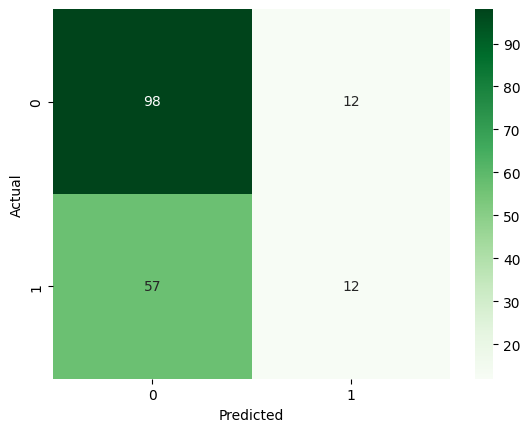

In [57]:
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

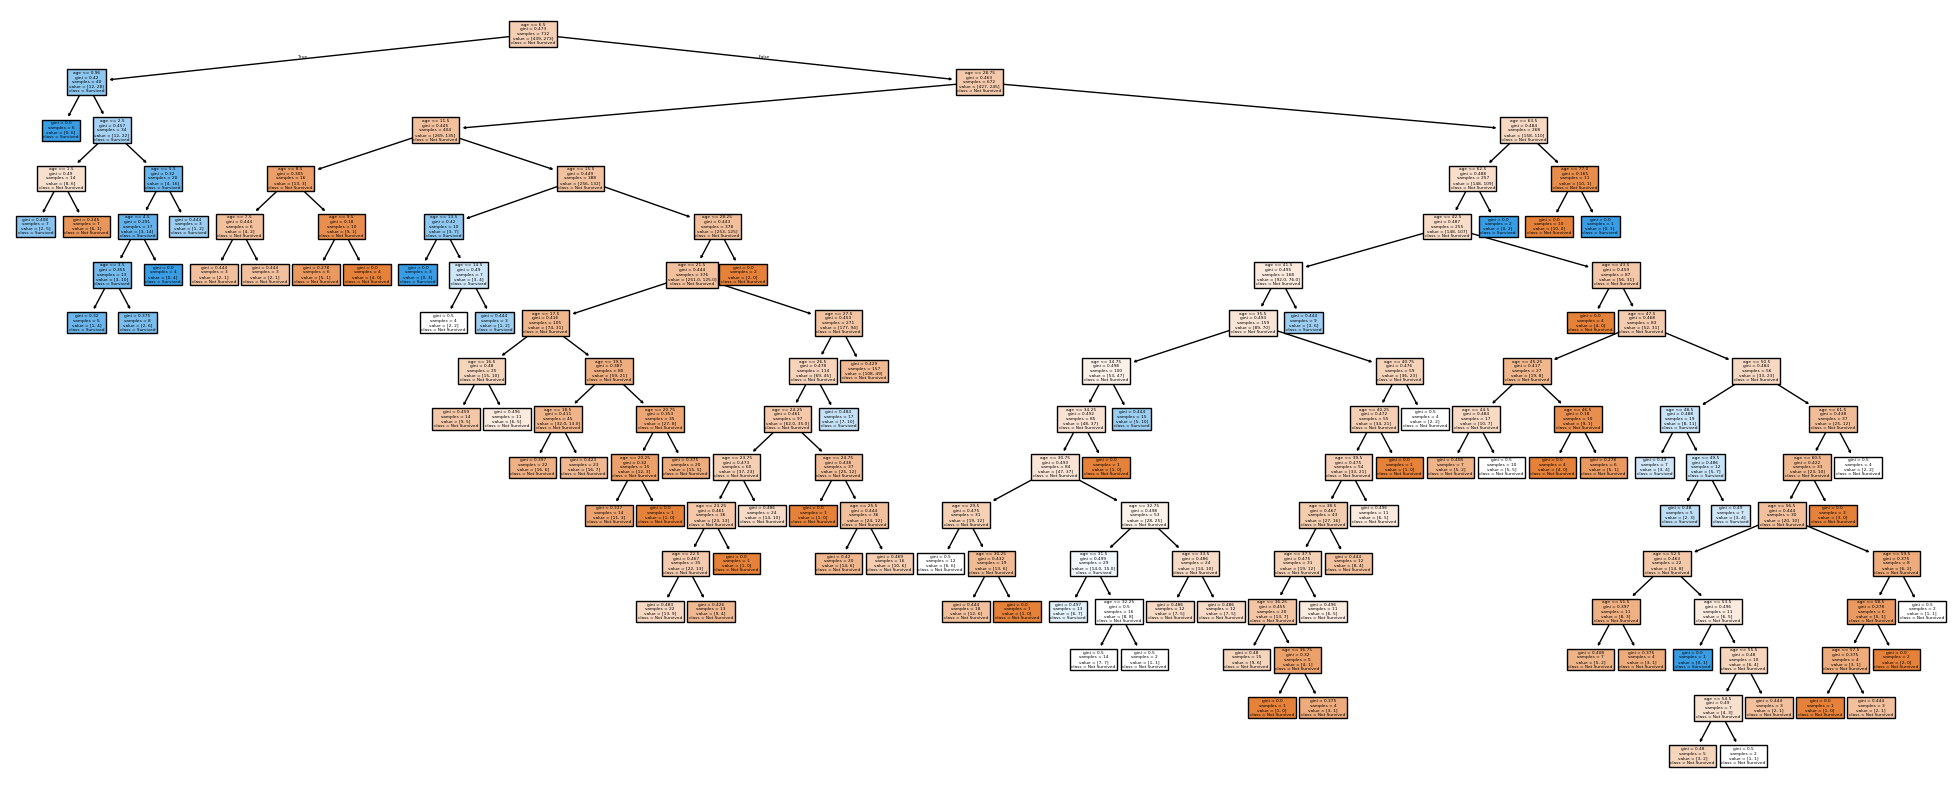

In [58]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

#### Section 4. Train a Classification Model (Decision Tree) - Case #3
- 4.1 Split the Data

In [60]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X3, y3):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

Train size:  712 Test size:  179


In [61]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

# Predict and evaluate training data (X train)
y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [62]:
y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



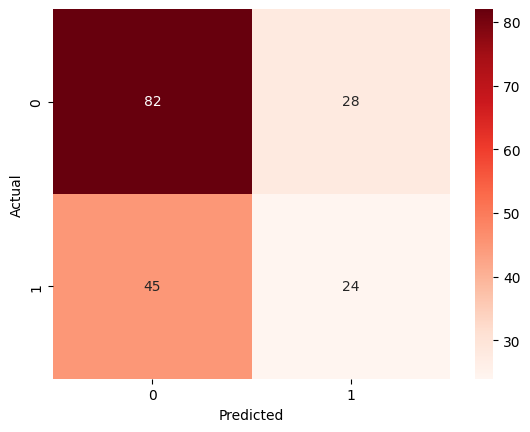

In [63]:
# Plot confusion matrix
cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

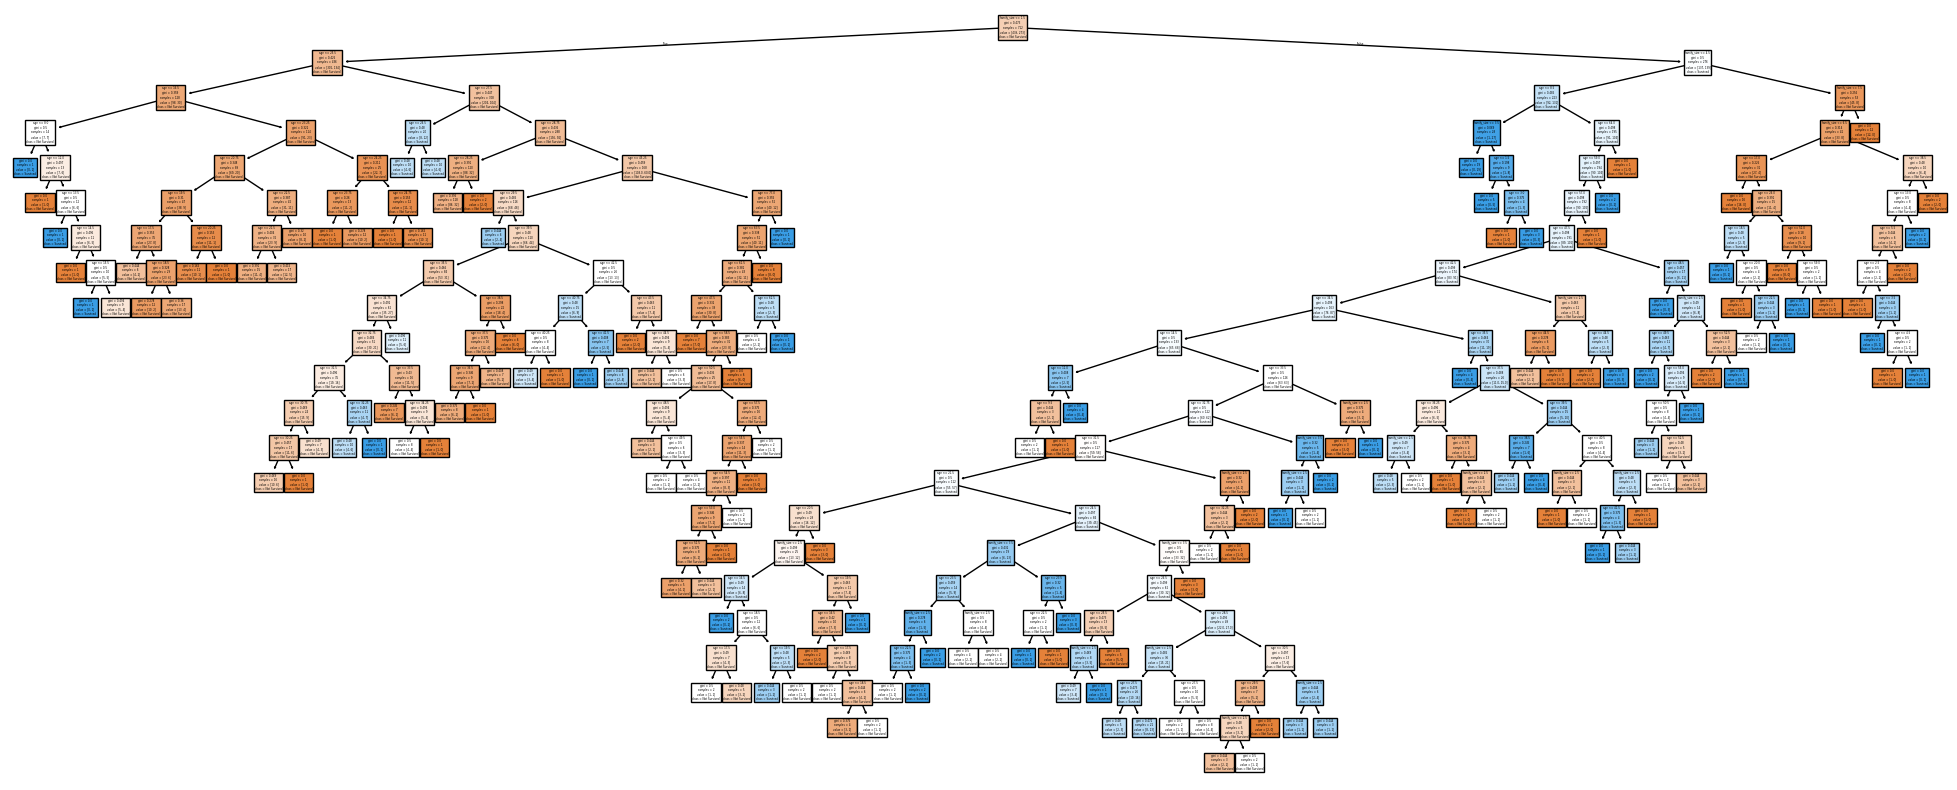

In [64]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

#### Reflection 4
How well did the different cases perform?

Case 1 (alone) 63% accuracy
Case 2 (age) 61% accuracy
Case 3 (age + family_size) 59% accuracy
Are there surprising results?

Yes, I would've expected case 3 to improve the accuracy of the model due to more features, but it's the lowest of the three cases.
Which inputs worked better?

The alone feature was the most accurate of the three features I chose.

##### Section 5. Compare Alternative Models (SVC, NN)

This section compares the performance of Support Vector Classifier (SVC) and Neural Networks (NN) for the Titanic dataset.

##### SVC Kernel Types
- RBF (default) – Best for non-linear data.
- Linear – Suitable for linearly separable data.
- Polynomial – For data with curved boundaries.
- Sigmoid – Less commonly used, similar to NN activation.

##### Choosing the Right Kernel:

- Use linear for simple, separable data.
- Try RBF for complex data.
- Use polynomial for curved boundaries.
- Sigmoid is rare for this type of problem.

##### 5.1 Train and Evaluate Model (SVC)
Train the SVC model (default kernel: RBF):

In [68]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [69]:
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



- Visualize Support Vectors

Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.

Step-by-Step Process:

1. Split the data into two groups:
- Survived – Passengers who survived the Titanic sinking (value = 1).
- Not Survived – Passengers who did not survive (value = 0).
2. Create a scatter plot of these two groups using different colors and markers:
- Yellow squares ('s') for survived passengers
- Cyan triangles ('^') for non-survived passengers
3. Overlay the support vectors on top of the plot:
- Black pluses ('+') will represent the support vectors.
- Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

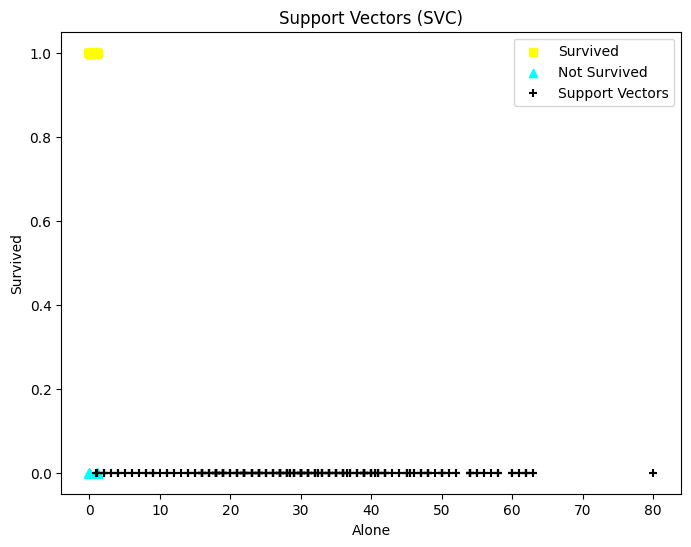

In [77]:
import matplotlib.pyplot as plt

# Filter the test set: 'alone' feature for survived and not survived passengers
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors if SVC model has them
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # Feature index 0 = 'alone'
    plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### 5.2 Train and Evaluate Model (NN MLP)

Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

Train a neural network model:

Case 1

In [78]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train)

c:\Users\Mahi2\projects\applied-ml-mk\applied-ml-mk\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

Predict and evaluate Neural Network model:

In [74]:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       166
           1       0.81      0.54      0.65       101

    accuracy                           0.78       267
   macro avg       0.79      0.73      0.74       267
weighted avg       0.78      0.78      0.77       267



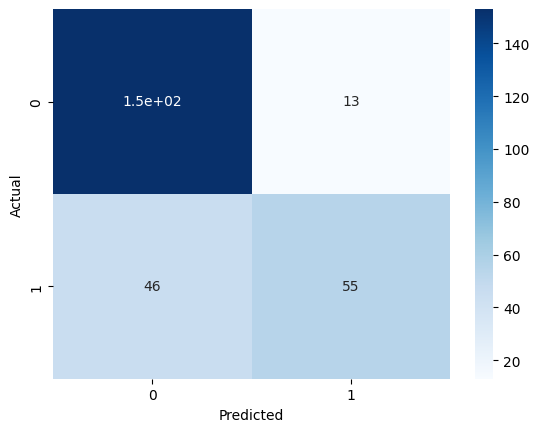

In [75]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Users\Mahi2\projects\applied-ml-mk\applied-ml-mk\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


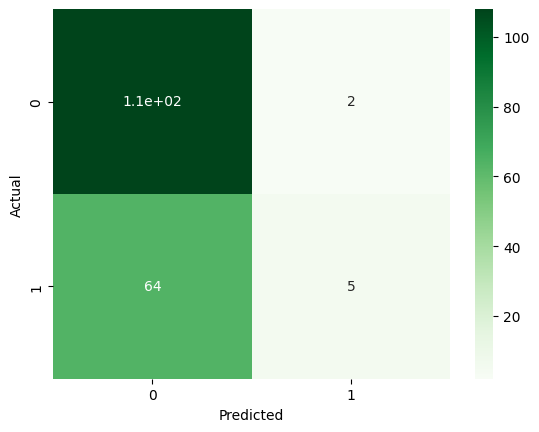

In [81]:
nn_model.fit(X2_train, y2_train)
y2_pred_nn = nn_model.predict(X2_test)

cm_nn = confusion_matrix(y2_test, y2_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Users\Mahi2\projects\applied-ml-mk\applied-ml-mk\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


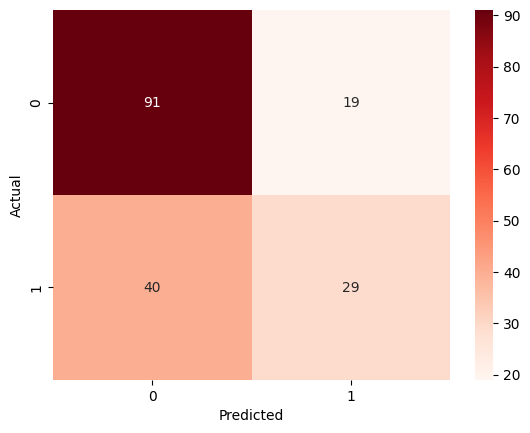

In [82]:
nn_model.fit(X3_train, y3_train)
y3_pred_nn = nn_model.predict(X3_test)

cm_nn = confusion_matrix(y3_test, y3_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Reflection 5:

How well did each model perform?
- The RBF Kernel Model had 63%, 63% and 68% accuracy for Case 1, 2, 3 respectively. (I was able to test it but received errors when trying to clear up some of the code.)

Are there any surprising results?
- No, I do believe that the decision tree performed better.

Why might one model outperform the others?
- Based off the type of data and how much data is present, models can perform better with the amount of data that is given compared to others.

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|----------|-------|
| Decision Tree | Case 1 | alone    | 63%      | 64%       | 63%    | 63%      | -     |
|               | Case 2 | age      | 61%      | 58%       | 61%    | 55%      | -     |
|               | Case 3 | age + family_size | 59% | 58% | 59% | 59% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63% | 664% | 63% | 63% | - |
|                    
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (Linear Kernel) | Case 1 | alone | 63% | 64% | 63% | 63% | - |


#### Section 6. Final Thoughts and Insights
6.1 Summarize Findings What indicators are strong predictors of gender? - I think that sex and age are strong predictors.

Decision Tree performed well but overfit slightly on training data.

Neural Network showed moderate improvement but introduced complexity.

6.2 Discuss Challenges Faced

Small sample size could limit generalizability.

Missing values (if any) could bias the model.

I faced many challenges with this lab. I was unable to run it successfully without changing some things. I was unable to run multiple tests for Section 5 because of missing values even though I had execute that step earlier in the lab. Because of this, there could be some bias or mistakes in the model.
6.3 Next Steps

Test more features (e.g., BMI class).

Try hyperparameter tuning for better results.